## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().any().any()

False

In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
def KNN(k, X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  return [knn.score(X_train, y_train).__round__(3), knn.score(X_test, y_test).__round__(3)]

scaler = StandardScaler()
X_knn_train = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_knn_test = scaler.fit_transform(X_test[['alcohol', 'magnesium']])
print("Results of knn with different params (n_neighbors)" + "\n" + "NN   Train Test")
for i in [1, 3, 5]:
  print(i, "  ", *KNN(i, X_knn_train, y_train, X_knn_test, y_test))
for i in [10, 15, 25]:
  print(i, " ", *KNN(i, X_knn_train, y_train, X_knn_test, y_test))

Results of knn with different params (n_neighbors)
NN   Train Test
1    0.992 0.648
3    0.815 0.648
5    0.798 0.704
10   0.742 0.722
15   0.677 0.722
25   0.71 0.778


/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [39]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.1 MB/s eta 0:00:00a 0:00:01


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

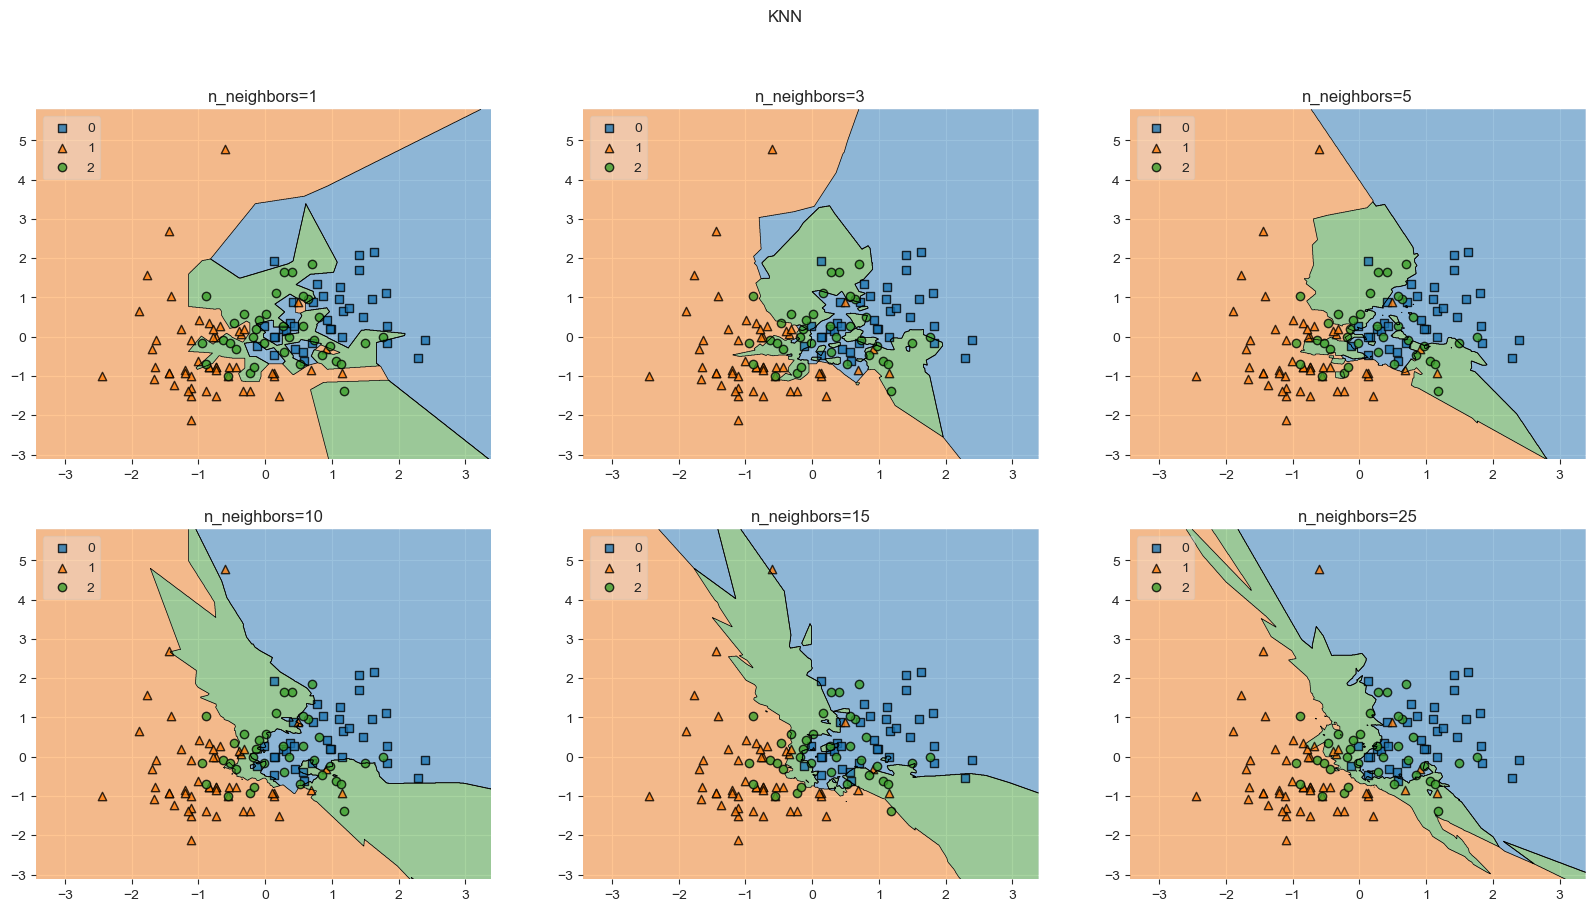

In [9]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('KNN')

for i, j in zip([1, 3, 5, 10, 15, 25], [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]):
  fig = plot_decision_regions(X_knn_train, y_train, clf=KNeighborsClassifier(n_neighbors=i).fit(X_knn_train, y_train), legend=2, ax=ax[j[0], j[1]])
  ax[j[0], j[1]].set_title(f'n_neighbors={i}')
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

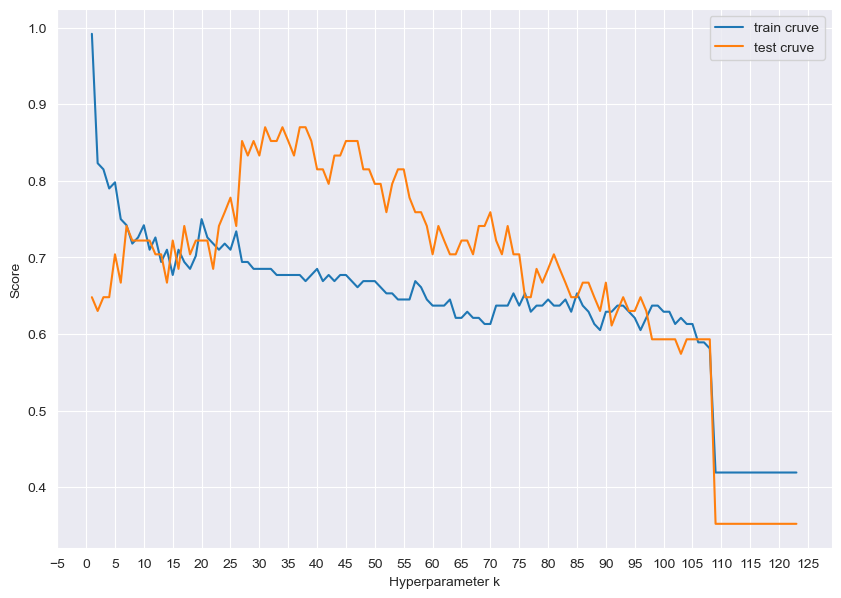

In [10]:
import matplotlib.ticker as ticker

params = np.array([i for i in range(1, 124)])
train = []
test = []
for i in params:
  knn = KNN(i, X_knn_train, y_train, X_knn_test, y_test)
  train.append(knn[0])
  test.append(knn[1])

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(params, train, label='train cruve')
ax.plot(params, test, label='test cruve')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel("Hyperparameter k")
plt.ylabel("Score")
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(2, 40)}
knn = KNeighborsClassifier()
l = []
for i in range(3, 10):
  grid = GridSearchCV(knn, params, cv=i)
  grid.fit(X_knn_train, y_train)
  l.append(str(grid.best_params_["n_neighbors"]) + ": " + str(grid.score(X_knn_test, y_test)) + "\n")
print(*l)

/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

14: 0.6666666666666666
 6: 0.6666666666666666
 8: 0.7222222222222222
 18: 0.7037037037037037
 18: 0.7037037037037037
 10: 0.7222222222222222
 18: 0.7037037037037037



/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

Прогнав кнн с разными k, используя кросс-валидацию с разным количеством фолдов, можно увидеть, что чаще всего выбор идет в пользу k = 18, но в целом лучшие показатели получаются в диапозоне от 5 до 20, при том схожие результаты можно видеть и в номере 1.3. Из графиков из 1.5 можно лишь понять, что модели с маленким гиперпараметром переобучились на тестовой выборке и вряд ли покажут хорогий результат на тестовой.
Лично мой выбор склоняется больше к 8, 10, 18, которые показали достойный результат на тестовой выборке

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

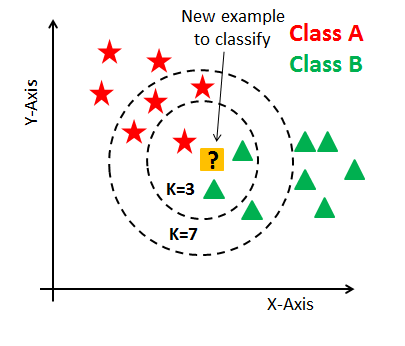

In [130]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.y = None
        self.X = None
        self.k = k
    
    def fit(self, X, y):
      self.X = X
      self.y = y
      pass
    
    def predict(self, X):
      res = []
      for elem in X:
        neig = self.X - elem
        ros = pd.DataFrame(data=np.array([(neig[:, 0] ** 2 + neig[:, 1] ** 2) ** 0.5, self.y]).T, columns=['ro', 'answer'])
        ros = ros.sort_values(by='ro', ascending=True)
        ro = np.array(ros.answer)
        elem_res = []
        for i in range(self.k):
          elem_res.append(ro[i])
        res.append(1 if sum(elem_res) / self.k >= 0.5 else 0)
      return np.array(res)

In [131]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train = np.array([[1, 1], [2, 2]])
  y_train = np.array([0, 1])
  X_test = np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [132]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [135]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [137]:
data.isnull().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [142]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Все столбцы кроме "Unnamed: 0" так или иначе несут информацию об алмазе, которую можно будет интерпретировать для предсказания цены (Не понятно какую информацию несут стобцы x, y, z, но они могут быть полезны для предсказания)

In [144]:
data.drop(columns='Unnamed: 0', inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [148]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшая корреляция с ключевой переменной наблюдается у признаков: x, y, z, carat (около 0.9)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [155]:
s = pd.get_dummies(pd.Series(data.cut))
s1 = pd.get_dummies(pd.Series(data.color))
s2 = pd.get_dummies(pd.Series(data.clarity))
data = data.join(s).join(s1).join(s2)
data.drop(columns=['color', 'cut', 'clarity'], inplace=True)

In [158]:
data.head(5)

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='price'), data.price, test_size=0.3, random_state=1)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [160]:
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [163]:
X_norm_test[:5]

array([[-1.00420276, -0.04674884, -1.09951361, -1.18029217, -1.16254383,
        -1.16779819, -0.17874421, -0.32314487,  1.23199654, -0.58377261,
        -0.53595562, -0.37852484, -0.4656981 , -0.46981936, -0.51248458,
         2.33003911, -0.33044191, -0.23807596, -0.11981096, -0.18148711,
         1.75445861, -0.45594118, -0.41893301, -0.53977535, -0.26449015,
        -0.32651626],
       [ 0.86539035,  0.23270802, -0.20644992,  0.94509792,  0.88632783,
         0.94580741, -0.17874421, -0.32314487,  1.23199654, -0.58377261,
        -0.53595562, -0.37852484, -0.4656981 , -0.46981936, -0.51248458,
        -0.42917735,  3.0262505 , -0.23807596, -0.11981096, -0.18148711,
        -0.5699764 , -0.45594118, -0.41893301,  1.85262256, -0.26449015,
        -0.32651626],
       [-0.38100505, -0.53579833, -0.20644992, -0.20351715, -0.17908543,
        -0.249473  , -0.17874421, -0.32314487,  1.23199654, -0.58377261,
        -0.53595562,  2.64183458, -0.4656981 , -0.46981936, -0.51248458,
       

In [164]:
X_norm_train[:5]

array([[-1.0011366 , -0.16879775, -0.65177807, -1.16032405, -1.1492145 ,
        -1.15932439, -0.17395412, -0.31335429,  1.22334041, -0.58707591,
        -0.53781127, -0.37921043, -0.47341378, -0.46091888, -0.51544917,
        -0.4254501 ,  2.97675332, -0.23272884, -0.11724522, -0.18686738,
        -0.5633826 , -0.45215079, -0.42406001, -0.5433744 , -0.27177241,
         3.12513473],
       [ 1.5529171 ,  0.73833791,  0.24415295,  1.43589605,  1.36704495,
         1.50192583, -0.17395412, -0.31335429, -0.81743396,  1.70335725,
        -0.53781127, -0.37921043, -0.47341378,  2.16957917, -0.51544917,
        -0.4254501 , -0.33593647, -0.23272884, -0.11724522, -0.18686738,
         1.7749927 , -0.45215079, -0.42406001, -0.5433744 , -0.27177241,
        -0.3199862 ],
       [-0.18467681,  0.24988025, -0.65177807, -0.03499998,  0.01412463,
         0.01722834, -0.17395412, -0.31335429,  1.22334041, -0.58707591,
        -0.53781127, -0.37921043, -0.47341378,  2.16957917, -0.51544917,
       

In [175]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.091844,0.034196,-0.163660,0.116245,0.009568,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.280657,0.136114,-0.022778,-0.198306,0.025828,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.125332,0.175174,-0.549599,0.338072,0.119971,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.018728,-0.000312,-0.097175,0.095706,0.006593,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710,-0.000255,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.080644,0.030349,-0.162674,0.126820,0.004569,-0.106127,-0.134213,-0.048021,-0.024593,0.095896,0.146522,0.164658,0.108361,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.068822,0.032187,-0.153158,0.107943,0.016699,-0.103999,-0.130136,-0.046707,-0.024479,0.093480,0.142895,0.160776,0.100736,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.110367,0.045169,-0.158688,0.090019,0.016039,-0.105216,-0.132210,-0.048803,-0.024582,0.095041,0.145276,0.164217,0.111913,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
Fair,0.091844,0.280657,0.125332,0.018728,0.080644,0.068822,0.110367,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,-0.012893,-0.019334,0.007763,-0.006171,0.016646,0.004770,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,0.008909,0.007013,0.006949,-0.024729,-0.009517,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,0.014521,-0.001105,0.001351,0.034649,-0.021264,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [166]:
from sklearn.linear_model import LinearRegression

In [173]:
reg = LinearRegression().fit(X_norm_train, y_train)
((y_train - reg.predict(X_norm_train)) ** 2).mean() ** 0.5, ((y_test - reg.predict(X_norm_test)) ** 2).mean() ** 0.5

(1144.604475800439, 21622253602191.12)

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [174]:
reg.coef_

array([ 5.27784198e+03, -8.34761170e+01, -5.67473028e+01, -1.05051056e+03,
       -1.16711336e+00, -1.27639432e+01,  1.27301039e+13,  2.15130457e+13,
        3.69444412e+13,  3.29174718e+13,  3.14513938e+13,  4.41784844e+13,
        5.15344353e+13,  5.06573952e+13,  5.42675325e+13,  4.80039205e+13,
        4.02253720e+13,  2.94186939e+13,  2.26614730e+14,  3.53793030e+14,
        8.37930700e+14,  7.35563748e+14,  7.04257280e+14,  8.21988924e+14,
        4.95883798e+14,  5.68745333e+14])

У переменных начиная с 6 очень большие коэффициенты (это переменные, которые появились после кодирования категориальных признаков)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [177]:
from sklearn.linear_model import Ridge, Lasso

lasso_reg = Lasso(alpha=10)
ridge_reg = Ridge(alpha=10)
lasso_reg.fit(X_norm_train, y_train)
ridge_reg.fit(X_norm_train, y_train)
ridge_reg.coef_

array([ 5.24178491e+03, -8.11498932e+01, -5.66086246e+01, -1.00925118e+03,
       -2.96683574e+00, -1.70427234e+01, -1.25762276e+02, -4.08532699e+01,
        5.15266746e+01,  1.46675177e+01,  2.96976677e+00,  2.09420875e+02,
        1.59765102e+02,  1.37605935e+02,  5.70618290e+01, -1.29101124e+02,
       -2.48980199e+02, -3.85468603e+02, -4.73611403e+02,  2.47711833e+02,
       -1.54993806e+02, -4.90971847e+02,  2.04872395e+02,  1.03413424e+02,
        2.55593038e+02,  2.71952560e+02])

In [178]:
lasso_reg.coef_

array([4827.68704651,  -51.11785433,  -43.66715276, -611.20952026,
         -0.        ,  -23.65271965, -126.66005875,  -41.87813088,
         42.22291766,    0.        ,   -0.        ,  145.64838546,
         89.18090336,   67.27095884,   -0.        , -172.82437437,
       -279.07783198, -401.96670033, -489.27589314,  195.96089079,
       -261.22105723, -574.71534988,  103.0830066 ,   -0.        ,
        187.22374807,  192.98332386])

Действительно веса значительно уменьшились, что в полной мере решает проблему мультиколлинеарности, которая была в изначальной регрессии. На нее как раз и указывают большие коэффициенты

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/Users/nikitaevseev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.494e+08, tolerance: 6.102e+07
  model = cd_fast.enet_coordinate_descent(


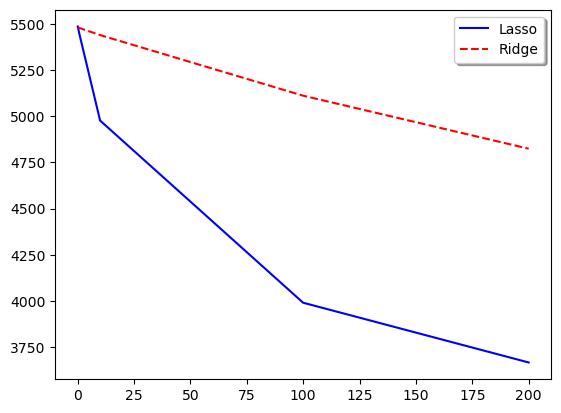

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)
a = [0.1, 1, 10, 100, 200]
env_lasso = []
env_ridge = []
for i in a:
  lasso_reg = Lasso(alpha=i)
  ridge_reg = Ridge(alpha=i)
  lasso_reg.fit(X_norm_train, y_train)
  ridge_reg.fit(X_norm_train, y_train)
  env_ridge.append(np.linalg.norm(ridge_reg.coef_))
  env_lasso.append(np.linalg.norm(lasso_reg.coef_))

ax.plot(a, env_lasso, color='blue', linestyle='-', label='Lasso')
ax.plot(a, env_ridge, color='red', linestyle='--', label='Ridge')
ax.legend(shadow = True)
plt.show()

Как видим по графику, веса у Лассо убывают сильнее. Также Лассо полезен для отбора лишних признаков, понять это можно посмотрев на подобранные веса, главным показателем значимости является размер веса, а те что имеют вес = 0 и являются лишними.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [194]:
from sklearn.linear_model import LassoCV

a = [0.1, 1, 10, 100, 200]
reg = LassoCV(cv=5, random_state=1, alphas=a).fit(X_norm_train, y_train)
np.mean(reg.mse_path_, axis=1)

array([1980846.59902099, 1557941.34033576, 1323861.91280537,
       1313468.95680615, 1313490.85785814])

In [191]:
reg.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

Самая минимальная средняя ошибка достигается при а = 1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [195]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_norm_train, y_train)
lasso_reg.coef_

array([ 5232.70736275,   -80.36017866,   -55.49387846, -1006.84991371,
          -0.        ,   -14.21682745,  -130.70720659,   -49.34471081,
          36.07438987,     0.        ,    -9.53336069,   161.54610824,
         104.18975509,    83.03376322,    -0.        ,  -179.10567344,
        -290.61501978,  -415.66344157,  -501.34946154,   202.14812224,
        -260.18494377,  -582.93901855,   115.00437499,    -0.        ,
         192.14706531,   199.35690107])

Наиболее информативными являются carat, а наименее те, что с 0

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [197]:
reg = LinearRegression().fit(X_norm_train, y_train)
print("LinReg", ((y_test - reg.predict(X_norm_test)) ** 2).mean() ** 0.5, "LassoReg", ((y_test - lasso_reg.predict(X_norm_test)) ** 2).mean() ** 0.5)

LinReg 21622253602191.12 LassoReg 1100.8861340886508


Лучший показатель получила Лассо Регрессия (из-за того, что она не допускает переобучения, за счет штрафа за большие веса)